<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class17_TimeSeries_UKweather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CST3512 Class 17    

**Time Series - UK Weather**    

*notebook courtesy of Professor Elena Filatova, CUNY CityTech, 2022*    



## What is time series?


Readings:
* [Time Series Analysis with Pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
* [Brief Tutorial](https://towardsdatascience.com/time-series-analysis-for-beginners-8a200552e332)


A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. A time series can be taken on any variable that changes over time.

The usage of time series models is twofold:

* Obtain an understanding of the underlying forces and structure that produced the observed data;
* Fit a model and proceed to forecasting, monitoring or even feedback and feedforward control.

Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, intelligent transport and trajectory forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

Time series are very frequently plotted via line charts.

Here is information on a few time series examples in the real world:

* [Central England Temperatures 1659-2016](http://clivebest.com/blog/?p=7603)
* [U.S. Real GDP Per Capita (1900 – 2017): Current Economy vs Historical Trend Line](https://bfi.uchicago.edu/insight/chart/u-s-real-gdp-per-capita-1900-2017-current-economy-vs-historical-trendline/)
* [New York City's overall water consumption](https://www.reddit.com/r/dataisbeautiful/comments/9tzmkp/oc_surprisingly_new_york_citys_overall_water/)



---



## Working with time series in pandas

Pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the [NumPy](https://numpy.org/) `datetime64` and `timedelta64` dtypes, pandas consolidated a large number of features from other Python libraries as well as created a tremendous amount of new functionality for manipulating time series data.

In working with time series data, you will frequently seek to:

* generate sequences of fixed-frequency dates and time spans
* conform or convert time series to a particular frequency
* compute "relative" dates based on various non-standard time increments (e.g. 5 business days before the last business day of the year) or "roll" dates forward or backward

The following examples demonstrate how to work with time, date and datetime data using pandas.

First of all, let's generate a list of datetime values for 3 neighboring days starting from 10/01/2021 with the interval equals to one hour. The [date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html?highlight=date_range) function can return such list in [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.strftime.html) format. We simply should define the left bound for generating dates start ("10/01/2021" in our case), the right bound for generating dates end or the amount of intervals periods (3*24 in our case, because we are going to cover three days) and preferable frequency freq ('H' in our case)

In [3]:
# Import pandas library at first
import pandas as pd

example_range = pd.date_range(start='11/01/2022', periods=3*24, freq='H')
print("Amount of elements:", len(example_range.values))
example_range[:25]

Amount of elements: 72


DatetimeIndex(['2022-11-01 00:00:00', '2022-11-01 01:00:00',
               '2022-11-01 02:00:00', '2022-11-01 03:00:00',
               '2022-11-01 04:00:00', '2022-11-01 05:00:00',
               '2022-11-01 06:00:00', '2022-11-01 07:00:00',
               '2022-11-01 08:00:00', '2022-11-01 09:00:00',
               '2022-11-01 10:00:00', '2022-11-01 11:00:00',
               '2022-11-01 12:00:00', '2022-11-01 13:00:00',
               '2022-11-01 14:00:00', '2022-11-01 15:00:00',
               '2022-11-01 16:00:00', '2022-11-01 17:00:00',
               '2022-11-01 18:00:00', '2022-11-01 19:00:00',
               '2022-11-01 20:00:00', '2022-11-01 21:00:00',
               '2022-11-01 22:00:00', '2022-11-01 23:00:00',
               '2022-11-02 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In the same way we can define any other period in the freq attribute, for example, days. The full list of possible values can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

Also, we can create time series, that can be manipulated naturally and easily. First step that we have to do is to create the range of dates for our time series (as mentioned above). Record starts at 2021-09-25 and ends at `2021-10-05`. Frequency of the data is one month (`freq='D'`).

In [4]:
dates = pd.date_range('2022-09-25', '2022-11-01', freq='D')
dates

DatetimeIndex(['2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
               '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
               '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10',
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
               '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30',
               '2022-10-31', '2022-11-01'],
              dtype='datetime64[ns]', freq='D')


To convert a `Series` or list-like object of date-like objects e.g. strings, epochs, or a mixture, you can use the [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function. When passed a Series, this returns a `Series` (with the same index), while a list-like is converted to a DatetimeIndex:

In [5]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-12-10', None]))

0   2009-07-31
1   2010-12-10
2          NaT
dtype: datetime64[ns]

Above NaT represents missing values of datetime type.

It converts date according to yyyy-mm-dd format independently of the input

In [6]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

If you use dates which start with the day first (i.e. European style), you can pass the `dayfirst` flag:



In [7]:
pd.to_datetime(['04-01-2012 10:00', '14-01-2012', '01-14-2012'], dayfirst=True)

DatetimeIndex(['2012-01-04 10:00:00', '2012-01-14 00:00:00',
               '2012-01-14 00:00:00'],
              dtype='datetime64[ns]', freq=None)

You can see in the above example that dayfirst isn’t strict, so if a date can’t be parsed with the day being first it will be parsed as if dayfirst were False.

If you pass a single string to `to_datetime`, it returns single [Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.time.html?highlight=time%20stamp). Also, `Timestamp` can accept the string input. Note that `Timestamp` doesn’t accept string parsing option like `dayfirst` or `format`, use `to_datetime` if these are required.

In [8]:
pd.to_datetime('2013/09/23')

Timestamp('2013-09-23 00:00:00')



---



## "Daily minimum temperatures in Melbourne" dataset

We're going to be looking some Daily minimum temperatures in Melbourne data from [DataMarket](https://en.wikipedia.org/wiki/DataMarket). This dataset is a list of days and daily minimum temperatures. You can see the data set [here](https://github.com/ef2020/TextFiles/blob/master/daily-minimum-temperatures-in-melbourne.csv). To download the dataset use the `raw` version of the file.  By default, it assumes that the fields are comma-separated. We will use it for reading the dataset file (we called it as "daily-minimum-temperatures-in-melbourne.csv")

In [9]:
!curl https://raw.githubusercontent.com/ef2020/TextFiles/master/daily-minimum-temperatures-in-melbourne.csv -o daily-minimum-temperatures-in-melbourne.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 64332  100 64332    0     0   140k      0 --:--:-- --:--:-- --:--:--  140k


In [10]:
melbourne_temp = pd.read_csv("daily-minimum-temperatures-in-melbourne.csv", 
                             skiprows=1,  # Allows to skip the header
                             names=["date", "temp"])  # Let's name columns in such way
melbourne_temp

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


Let's look at columns' types using `dtypes` method. Pay attention to the dataype for the date attribute. 

In [11]:
melbourne_temp.dtypes

date     object
temp    float64
dtype: object

Let us visualize the data we have. In the previous example we read data and got an Object type. 

To plot the data we have to convert the column "temp" to numeric using the `to_numeric` function. By doing this we change type to `float64` and we can use pyplot to visualize our dataset. We also should to apply the `to_datetime` function to the "date" column. It will allow using its values in filters (see below).

In [12]:
melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])


In [13]:
melbourne_temp.head(3)

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [14]:
melbourne_temp.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [15]:
melbourne_temp.set_index('date', inplace=True)

In [16]:
melbourne_temp.head(3)

,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [17]:
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# Let's change the size of figure drown by matplotlob. figsize represents width & height tuple in inches
rcParams['figure.figsize'] = (16, 6)

# Convert "date" column
#melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])
# Let's convert data to numeric so we can plot it
#melbourne_temp['temp'] = pd.to_numeric(melbourne_temp['temp'])

#melbourne_temp.set_index('date', inplace=True)

# Let's look at type of "temp" column
print("Type of 'temp' column:", melbourne_temp["temp"].dtypes)
melbourne_temp.head()

Type of 'temp' column: float64


,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Now we can see how the considering time series for temperature in Melbourne looks.

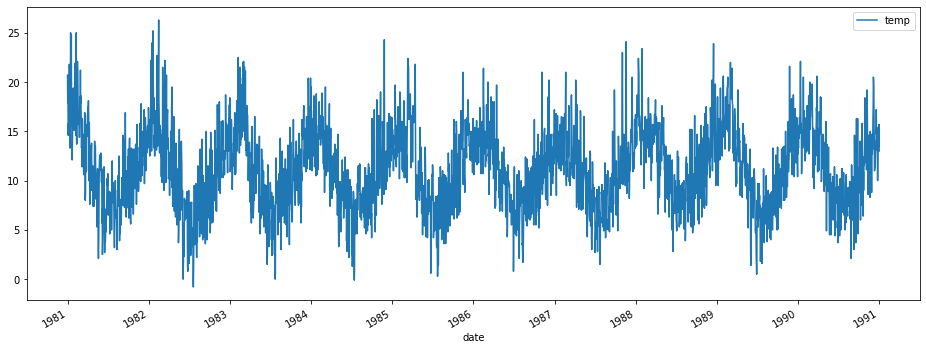

In [18]:
melbourne_temp.plot()
plt.show()

Pay attention that date labels were displayed automatically.



---



## Manipulation with data

Manipulation with data can help get an idea of the distribution and spread of values.

This may help with ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling.

First of all let's find the minimum temperature for all the time by specifing data and calling `min()` function

In [19]:
melbourne_temp.min()

temp   -0.8
dtype: float64

It is possible to select a specific time range defining the respecive year or month like this.

In [20]:
melbourne_temp['1981-01']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


or even date between some dates (recall list slicing from CST 1101)

In [21]:
melbourne_temp['1990-01-05':'1990-01-12']

,temp
date,
1990-01-05,14.3
1990-01-06,15.3
1990-01-07,16.4
1990-01-08,14.8
1990-01-09,17.4
1990-01-10,18.8
1990-01-11,22.1
1990-01-12,19.0


Thus we can build a plot for some sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


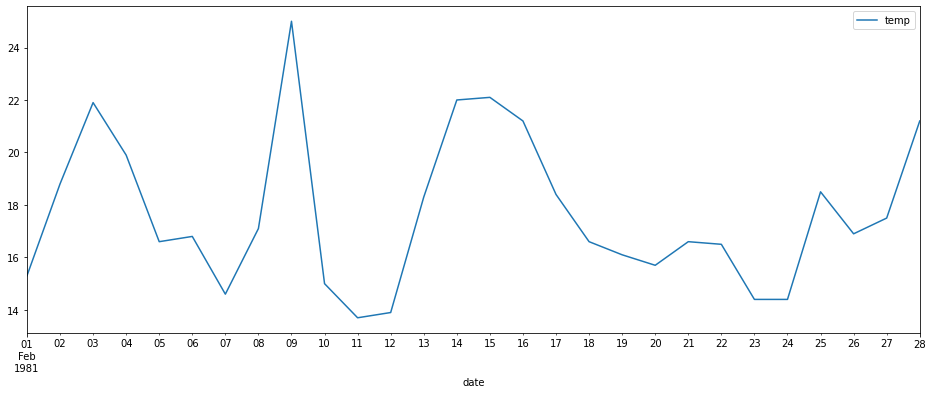

In [22]:
melbourne_temp['1981-02'].plot()
plt.show()

and apply any functions including statistical, for example, let's calculate the average temperature for the above plot

In [23]:
melbourne_temp['1981-02'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


temp    17.678571
dtype: float64

And finally, we count the number of dates where temperature was less then 2 degrees

In [24]:
print("Days with temperature less than 2 degrees:", (melbourne_temp < 2).sum().values[0])

Days with temperature less than 2 degrees: 28




---



## Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

* **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.
* **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

There are perhaps two main reasons why you may be interested in resampling your time series data:

* **Problem Framing**: Resampling may be required if your data is available at the same frequency that you want to make predictions.
* **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.
Let’s make resampling more concrete by looking at a real dataset and some examples.

We will use previous dataset "Daily minimum temperatures in Melbourne, Australia, 1981-1990"

Imagine that we want average weekly temparature information. In this case we have to unsample the information from daily to weekly.

We can use this function to transform our daily dataset into a weekly dataset by calling resampling and specifying the preferred frequency of calendar week frequency or "W".

###**INSERT TABLE OF RESAMPLE PERIODICITY HERE**

In [25]:
melbourne_temp.resample('W').mean().head(10)

,temp
date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429
1981-01-25,15.771429
1981-02-01,16.657143
1981-02-08,17.957143
1981-02-15,18.571429
1981-02-22,17.300000
1981-03-01,17.242857


Check yourself that in the "temp" is realy average temperature for respective week.

Instead of creating new rows between existing observations, the [resample()](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html) function in pandas will group all observations by the new frequency.

This operation is called *downsampling*.

We can downsample the data using the alias "A" for year-end frequency and this time use `min` to calculate the miminum (or `max` for maximum, everything you need) temperature of each year.

In [26]:
melbourne_temp.resample('A').min()

,temp
date,
1981-12-31,2.1
1982-12-31,-0.8
1983-12-31,0.0
1984-12-31,-0.1
1985-12-31,0.3
1986-12-31,0.8
1987-12-31,1.5
1988-12-31,2.8
1989-12-31,0.5


Resampling is also a fast way to smooth in some essence the time series. For instance, the time series of monthly averages has much less peaks or outliers and allows tracking the periodicity.

Much accurate way to smooth a time series is the cacluation of rolling average that is the average value of the current point and N previous points. It can be calcualted using [rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling#pandas.DataFrame.rolling) pandas's method where we should define the window, i.e. amount of points for average calculation.

## Rolling Average (Moving Average, Running Average)

(https://en.wikipedia.org/wiki/Moving_average)

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter. Variations include: simple, cumulative, or weighted forms.

Rolling Average is an example of a smoothing technique which is applied to time series to remove the fine-grained variation between time steps. (https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/)

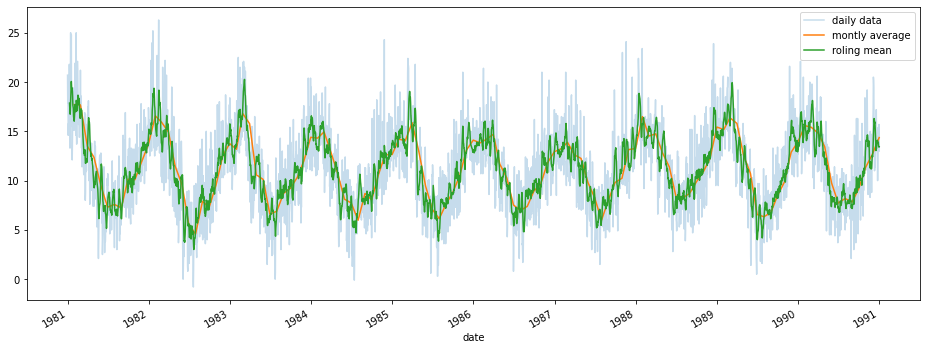

In [27]:
# Draw initial time series and make it transparent
ax = melbourne_temp.plot(alpha=0.25)
# Draw montly average values
melbourne_temp.resample('M').mean().plot(ax=ax)
# Draw roling average that takes into account 25 points
melbourne_temp.rolling(10).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

If you set the hourly frequency in the `resample()` function, then NaN values will be created, because there are no more tiny distribution of the temperature.

This procedure is called *upsampling*. Before you run this procedure, think if we have the temperature values for every hour. 

What do you expect to see? 

In [ ]:
upsampled = melbourne_temp.resample('H').mean()
upsampled.head(30)

But we can [interpolate](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.interpolate.html) the missing values at this new frequency.

The Series pandas's object provides the interpolate function to interpolate missing values. A good starting point is to use a `linear interpolation`. This draws a straight line between available data and fills in values at the chosen frequency from this line.

In [30]:
upsampled.head(30)

,temp
date,
1981-01-01 00:00:00,20.7
1981-01-01 01:00:00,NaN
1981-01-01 02:00:00,NaN
1981-01-01 03:00:00,NaN
1981-01-01 04:00:00,NaN
1981-01-01 05:00:00,NaN
1981-01-01 06:00:00,NaN
1981-01-01 07:00:00,NaN
1981-01-01 08:00:00,NaN


In [31]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

,temp
date,
1981-01-01 00:00:00,20.700000
1981-01-01 01:00:00,20.583333
1981-01-01 02:00:00,20.466667
1981-01-01 03:00:00,20.350000
1981-01-01 04:00:00,20.233333
1981-01-01 05:00:00,20.116667
1981-01-01 06:00:00,20.000000
1981-01-01 07:00:00,19.883333
1981-01-01 08:00:00,19.766667




---



## Another example of Time Series and Forecasting

Based on the book Introduction to Time Series and Forecasting by Brockwell and Davis

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [33]:
# This is just to select the style of the generated plots. Feel free to experiment
# and select other styles that you may like better. Notice that Style sheets are 
# designed to be composed together. So you can have a style sheet that customizes 
# colors and a separate style sheet that alters element sizes for presentations. 
# print(plt.style.available)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])



---



### Australian red wine "sales", (thousands of litres) monthly, Jan 80 - Oct 91

The file `AusWineSales.csv` contains the monthly sales of Australian red wines in for the period Jan-1980 to Oct-1991. Let us take a peak at the [data file](https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/master/AusWineSales.csv).

Additional Time Series Analysis of the Australian Wines data set can be found [here](https://github.com/rajansharm/Time-Series-Analysis/blob/master/Rajan_TimeSeries.ipynb). 

In [34]:
!curl https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/master/AusWineSales.csv -o AusWineSales.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4297  100  4297    0     0   9402      0 --:--:-- --:--:-- --:--:--  9402


In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/rajansharm/Time-Series-Analysis/master/AusWineSales.csv")  # if you use this line, you do not 
                                                                                                               # need the above cell with !curl
#df = pd.read_csv("AusWineSales.csv")


In [36]:
df.head(5)

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91


Pandas is relatively smart and can infer the data type of a column.

In [37]:
df.dtypes

YearMonth     object
Red            int64
Sparkling      int64
Sweetwhite     int64
dtype: object

In [39]:
df.describe

<bound method NDFrame.describe of     YearMonth   Red  Sparkling  Sweetwhite
0     1980-01   464       1686          85
1     1980-02   675       1591          89
2     1980-03   703       2304         109
3     1980-04   887       1712          95
4     1980-05  1139       1471          91
..        ...   ...        ...         ...
182   1995-03  2459       1897         188
183   1995-04  2618       1862         195
184   1995-05  2585       1670         189
185   1995-06  3310       1688         220
186   1995-07  3923       2031         274

[187 rows x 4 columns]>

In this case pandas figured out that Sales is a `number`, but not that Date is an `object`.

We can now try to plot directly the contents of the dataframe.

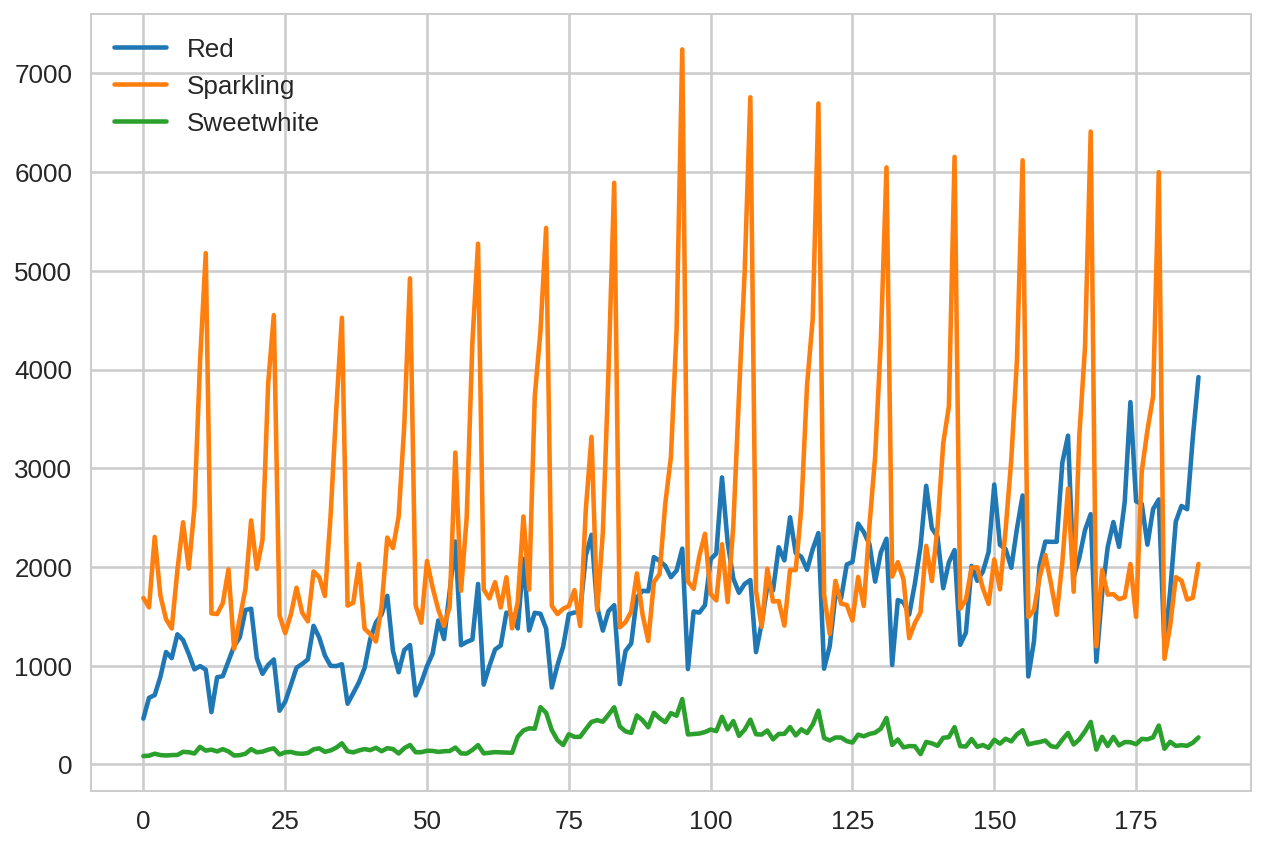

In [38]:
df.plot()

Why do we have a number on the x-axis?

The plot would look better if we had the x-axis to be a date, instead of a number. For that, we use the corresponding Pandas functions to convert the columns into the appropriate formats. We also tell Pandas to convert the Date column into the key for each row.

In [40]:
df["YearMonth"] = pd.to_datetime(df["YearMonth"])
df.set_index(keys="YearMonth", inplace=True)
df.head(5)

,Red,Sparkling,Sweetwhite
YearMonth,,,
1980-01-01,464,1686,85
1980-02-01,675,1591,89
1980-03-01,703,2304,109
1980-04-01,887,1712,95
1980-05-01,1139,1471,91


In [41]:
df.tail(5)

,Red,Sparkling,Sweetwhite
YearMonth,,,
1995-03-01,2459,1897,188
1995-04-01,2618,1862,195
1995-05-01,2585,1670,189
1995-06-01,3310,1688,220
1995-07-01,3923,2031,274


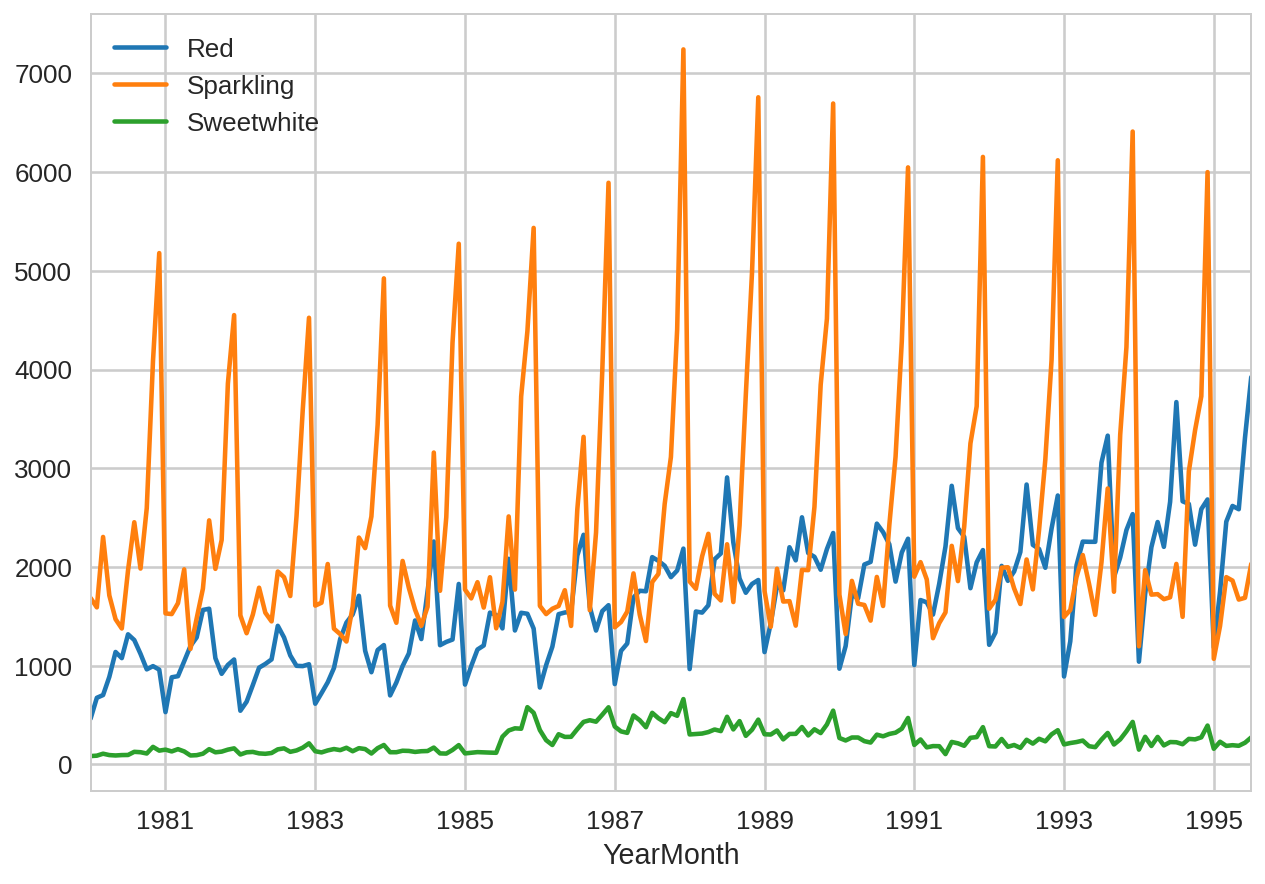

In [43]:
df.plot()

In [42]:
df_Red = df[["Red"]]
df_Sparkling = df[["Sparkling"]]
df_Sweetwhite = df[["Sweetwhite"]]

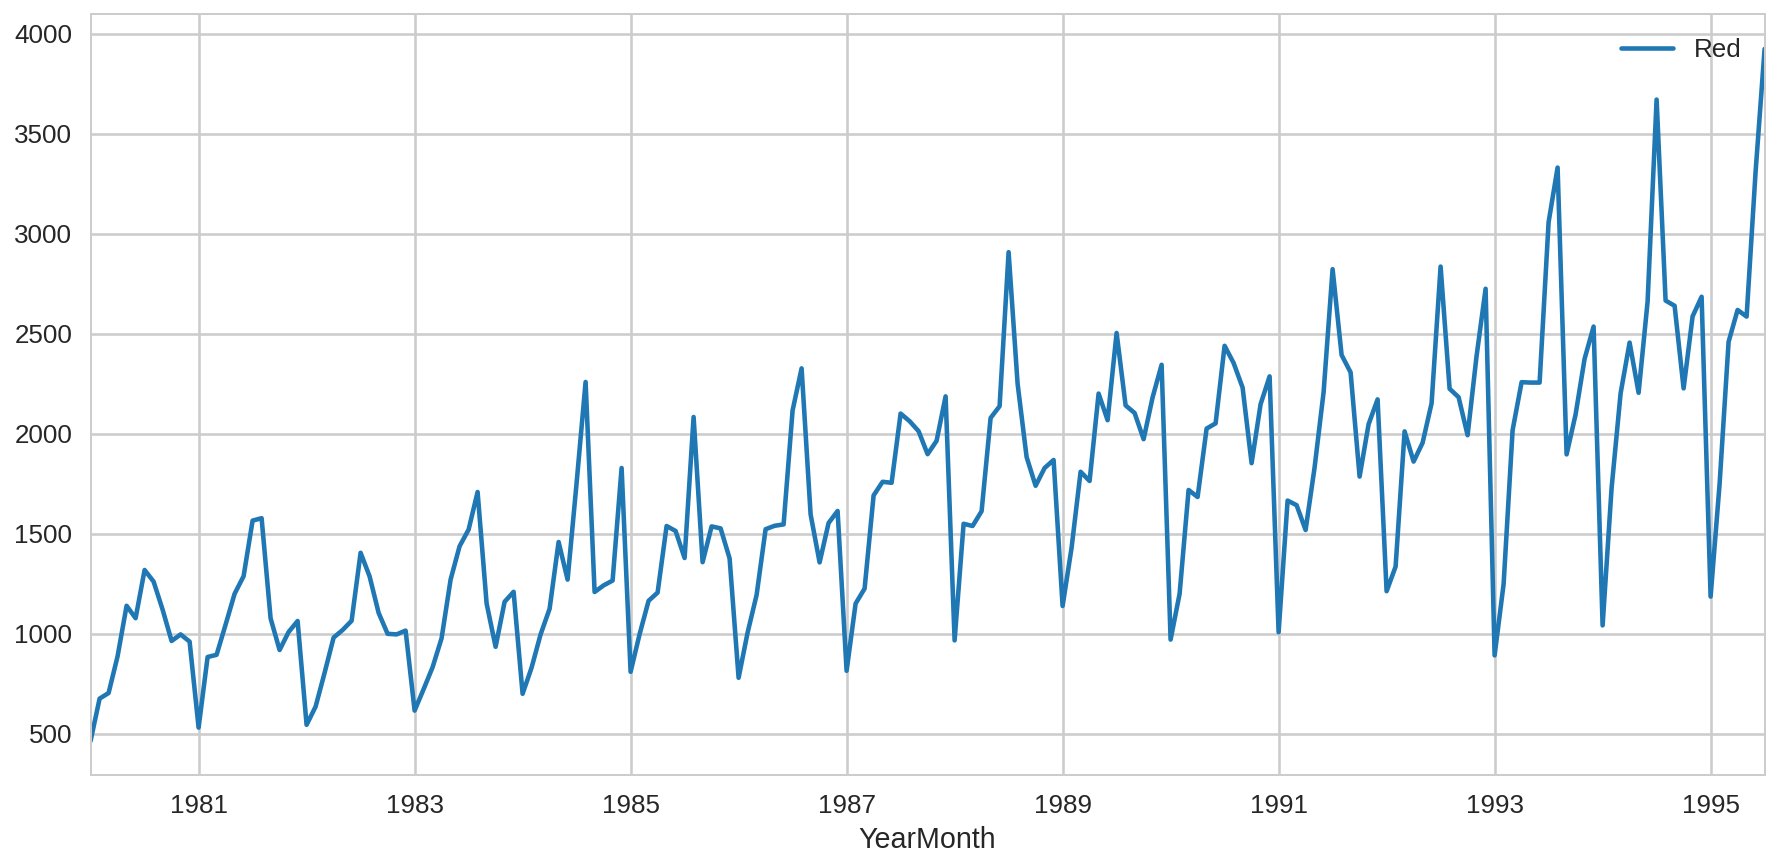

In [45]:
df_Red.plot(figsize=(15,7), grid=True)

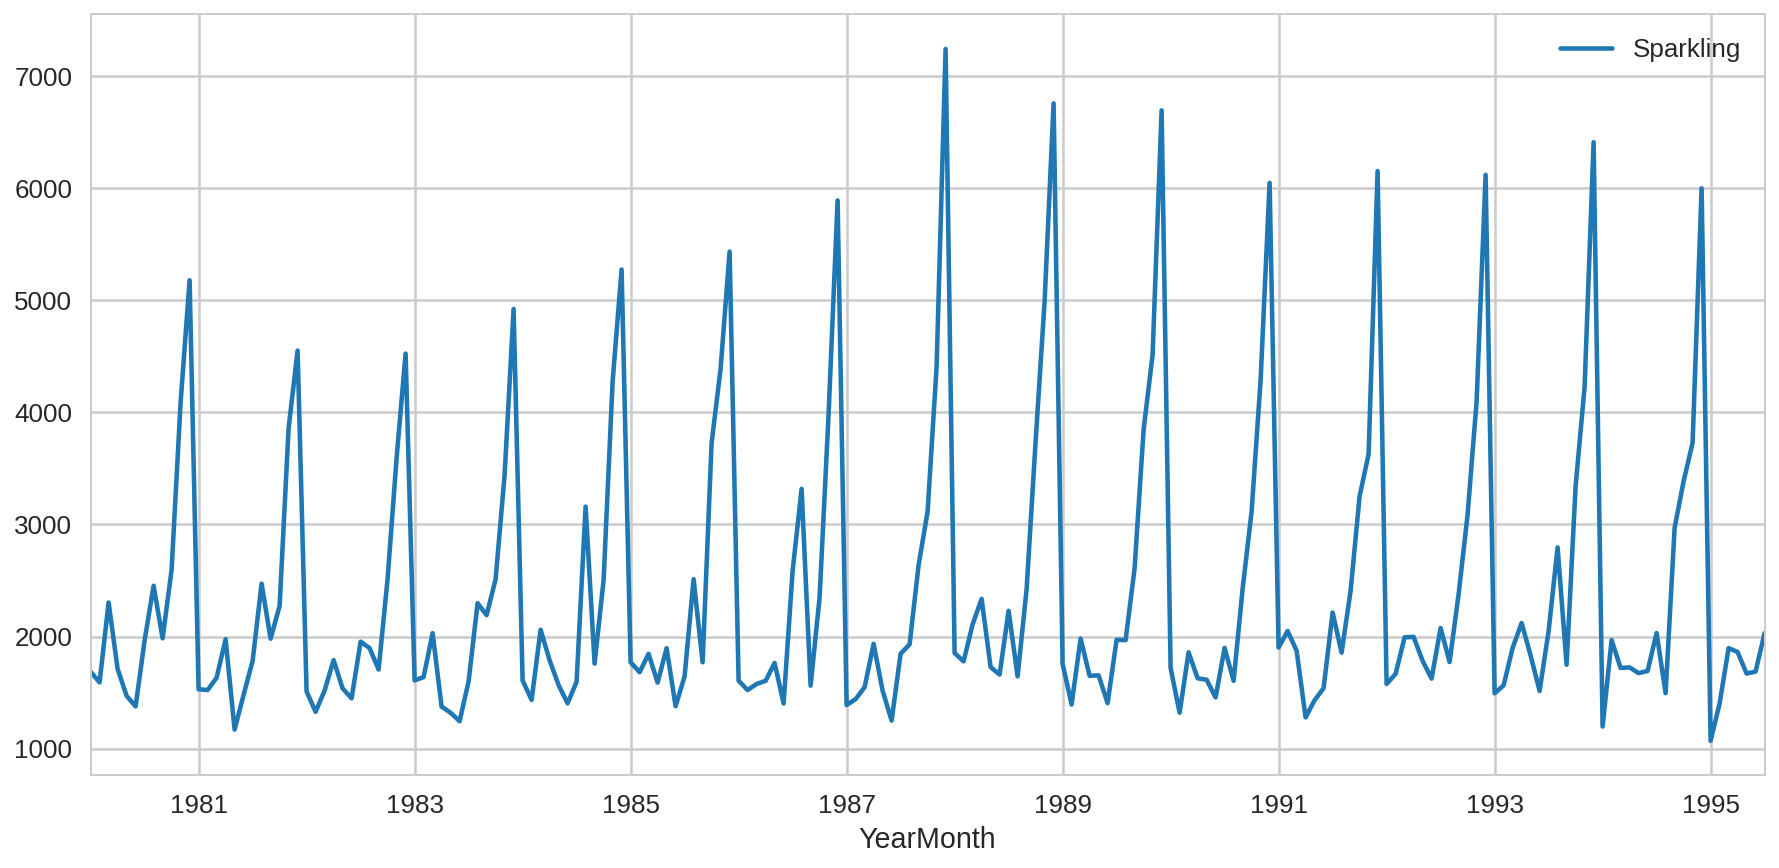

In [46]:
df_Sparkling.plot(figsize=(15,7), grid=True)

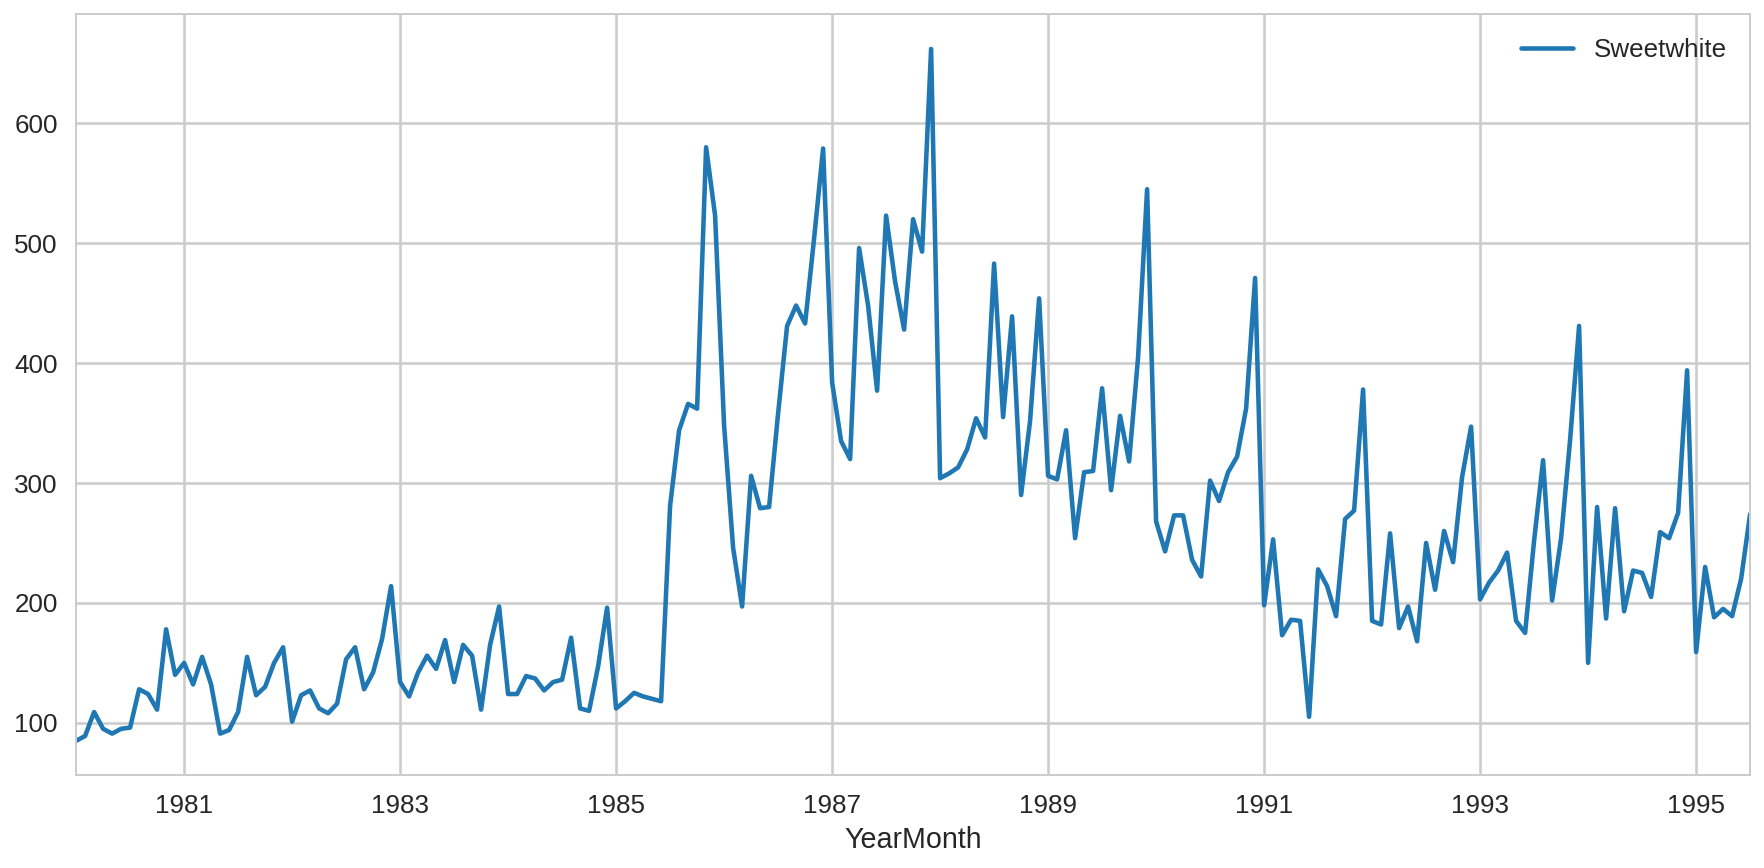

In [47]:
df_Sweetwhite.plot(figsize=(15,7), grid=True)

It appears from the graph that the sales have an upward trend and a seasonal pattern with a peak in July and a trough in January.



#### Jumping Ahead: Lag plots, autocorrelation plots, and decompositions.

Pandas provides two types of plots that can be used for the analysis of time series: the lag_plot and the autocorrelation_plot. We can also use the seasonal decomposition functionality of statsmodels to separate the time series into a trend, seasonal component, and residual noise. We will go quickly over these for now, mainly for demo purposes. Proper treatment of these topics require deeper analysis.

### Lag plot

The lag plot shows the value of the series at time $t$ vs. its value at time $t+1$. If there is no dependency (i.e., the time series is noise) then the lag plot is a scatterplot without any sign of correlation. If we can see a pattern and a correlation, then the series exhibits autocorrelation. For example, below we can see that there is a rather strong correlation of the two variables, indicating that the sales in time $t+1$ is similar to the sales at time $t$.

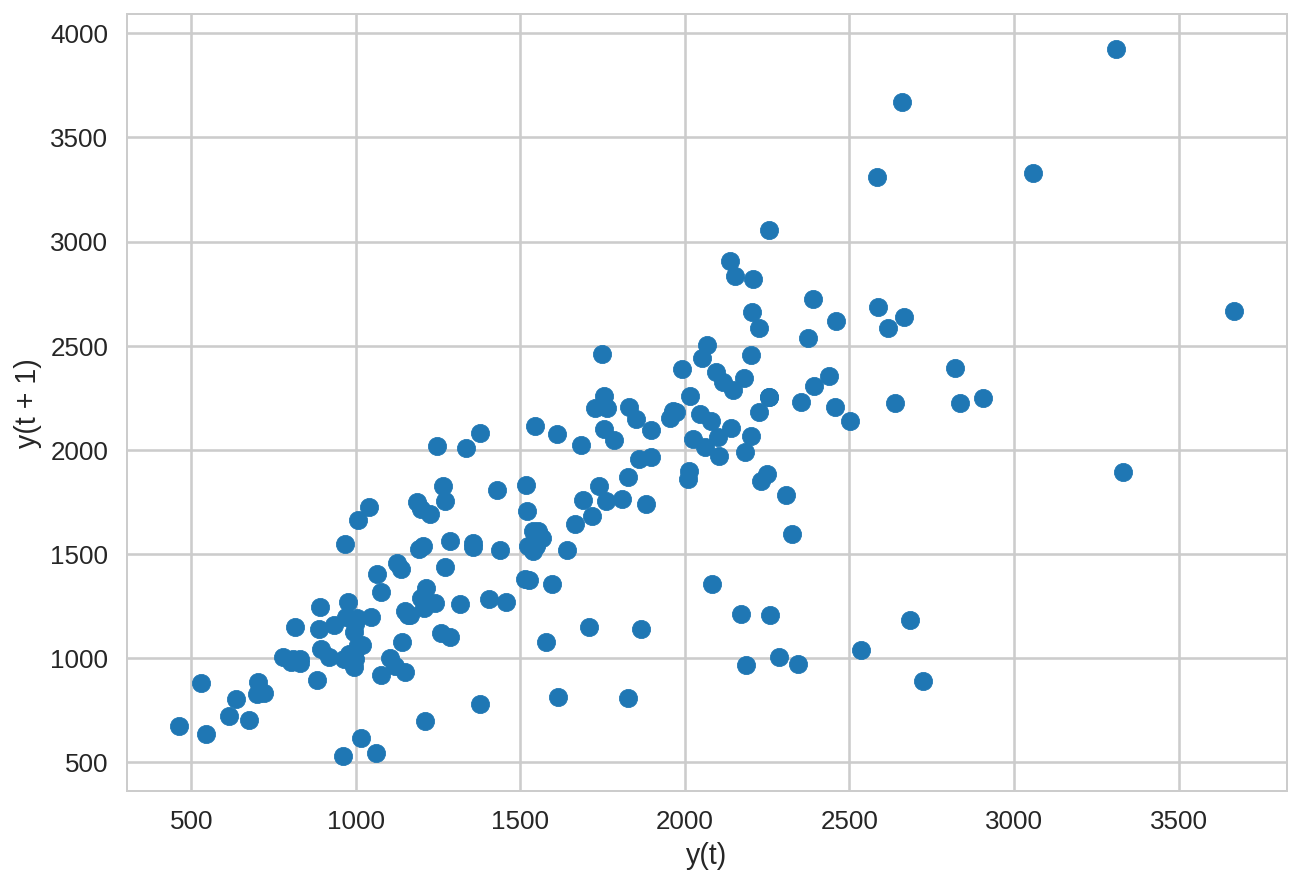

In [48]:
from pandas.plotting import lag_plot
lag_plot(df_Red["Red"])

### Autocorrelation Plot
In a more general setting, we want to also see if the value of the series at time $t$ is predictive of the value at time $t+n$. Such dependency would indicate that there is autocorrelation in the series. The autocorrelation plot shows the correlation value for various values of $n$.

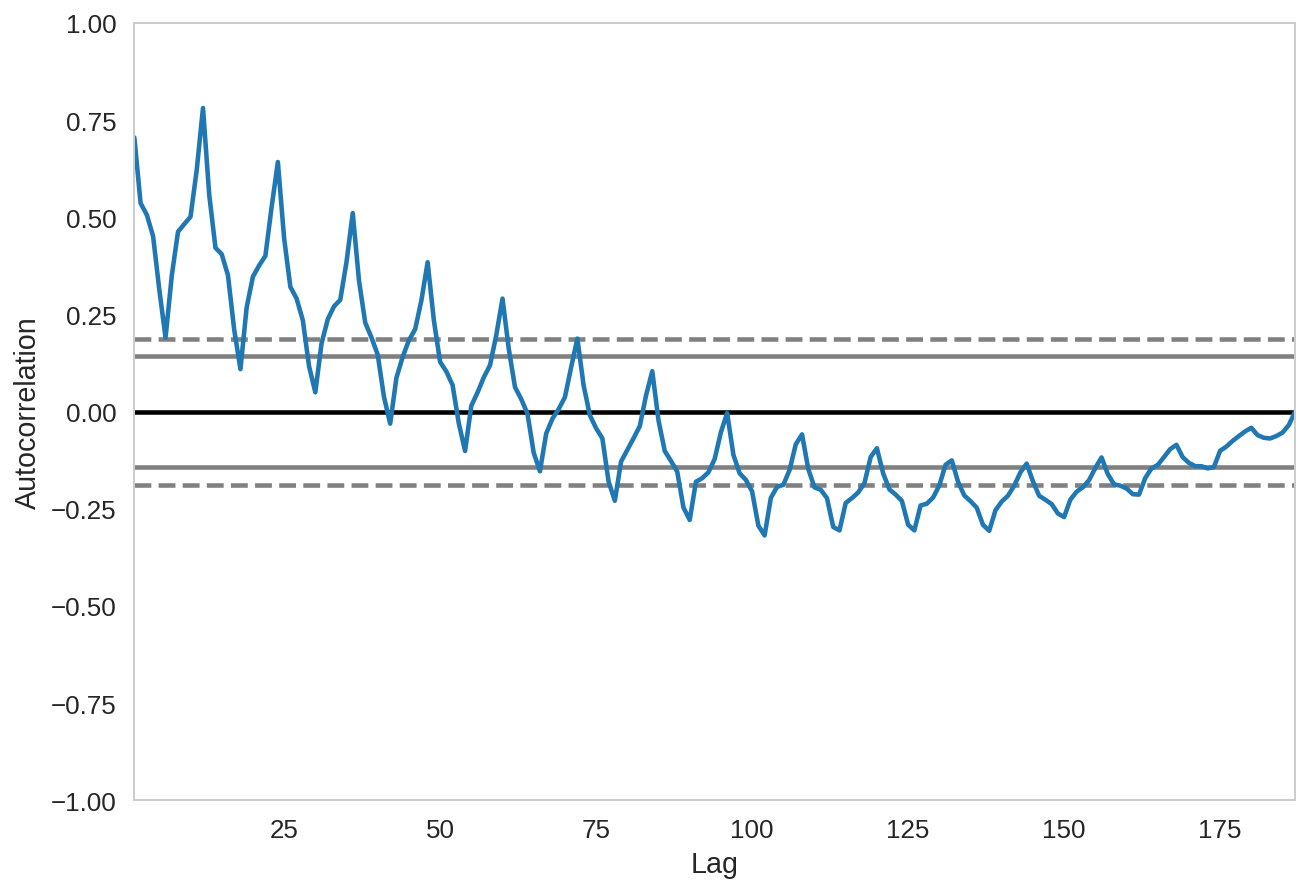

In [49]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_Red["Red"])



---



### Trend/Seasonal Decomposition

We will analyze red wines. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 748.8x514.8 with 0 Axes>

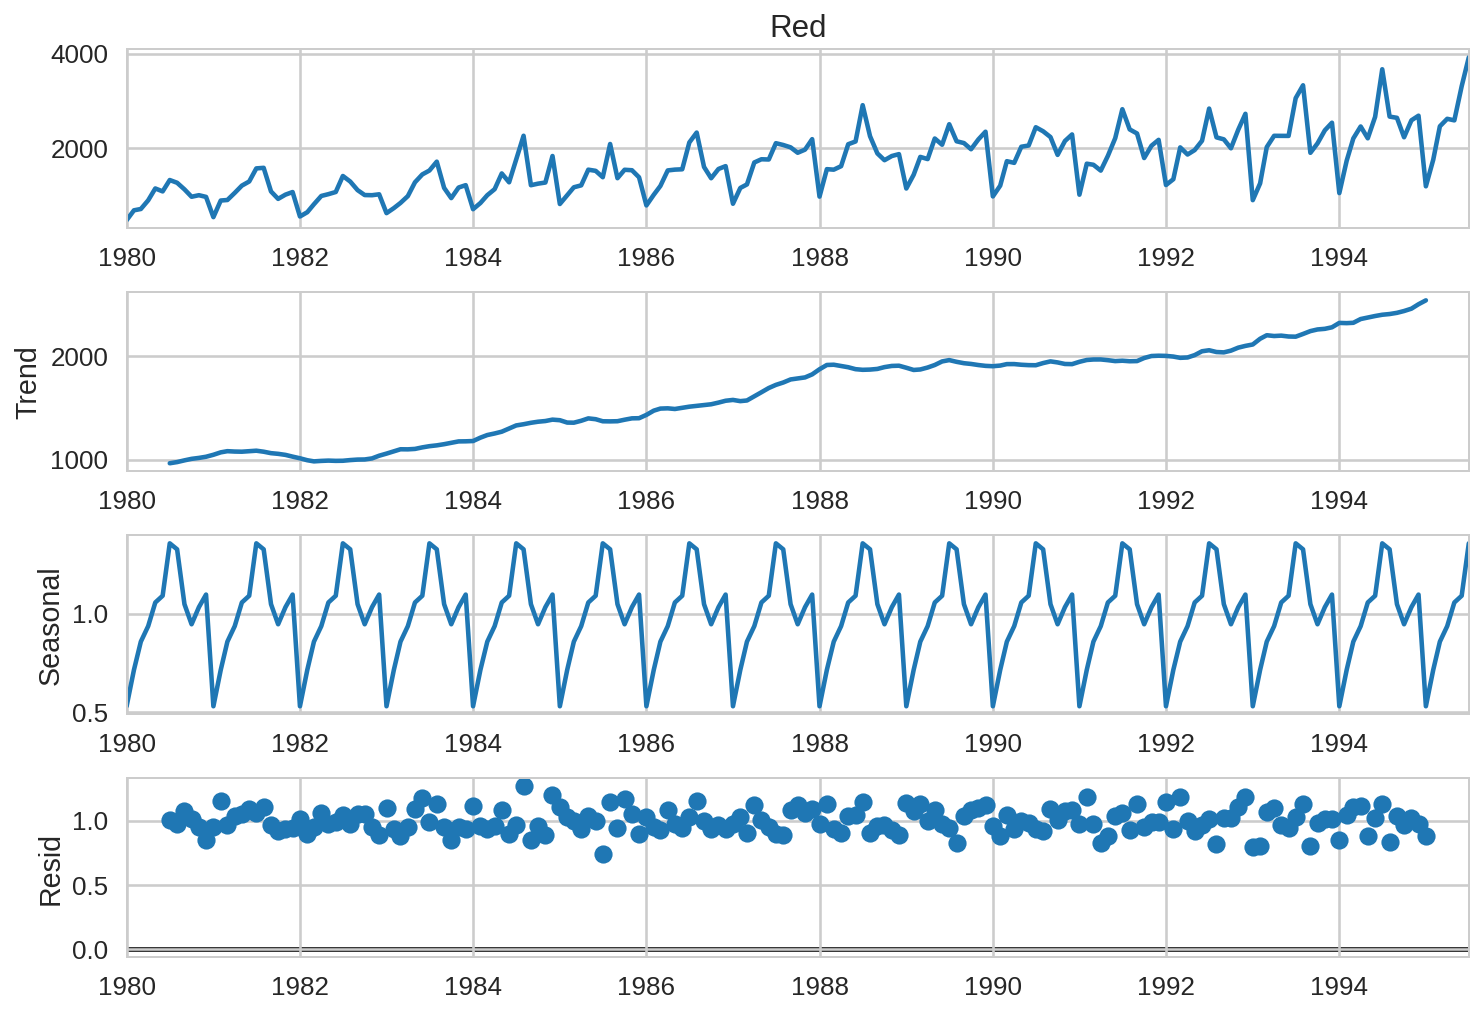

In [50]:

from statsmodels.tsa.seasonal import seasonal_decompose

# We decompose assumming a 12-month periodicity. 
# There is a weekly component as well, which we ignore.
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(df_Red['Red'], model='multiplicative', freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

### Accessing individual components of the decomposition
Once we have the decomposed time series model, we can also access the different components.

For example, we can get the trend of the time series, after removing the seasonality component:

In [51]:
# The outcome is a pandas Series, which is effectively the same as a single column of dataframe
decomposition.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

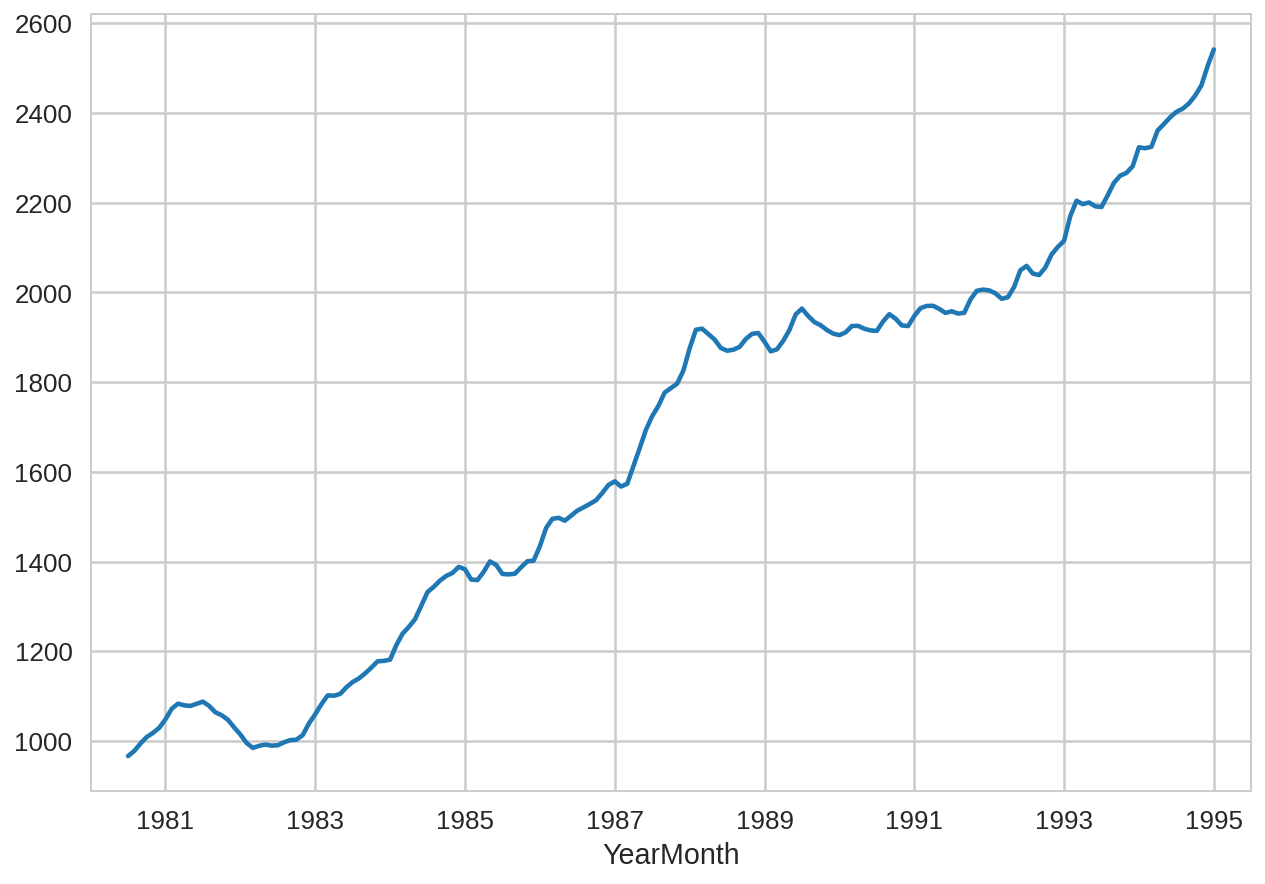

In [52]:
decomposition.trend.plot()



---



##Summary and Additional References    


See the article [ARIMA for Time Series with Python from MachineLearningMastery](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) on the development of analysis and use of the `ARIMA` model for the Melbourne temperature data set. 


*note: see the following CST3512 notebooks for additional time series material:*    

* **[CST3512_TimeSeries_AirPassengers](https://colab.research.google.com/drive/1t2InZbknRMJBmXs0gq0NcEhIuCduD3tq?usp=sharing)**    

* **[DataQuest Time Series Energy Tutorial](https://colab.research.google.com/drive/1TIVLt5XQWBpZGwonb3GTByHFo8LTcPL4?usp=sharing)**    


As mentioned at the start of this notebook, here is information on a few time series examples in the real world:

* [Central England Temperatures 1659-2016](http://clivebest.com/blog/?p=7603)
* [U.S. Real GDP Per Capita (1900 – 2017): Current Economy vs Historical Trend Line](https://bfi.uchicago.edu/insight/chart/u-s-real-gdp-per-capita-1900-2017-current-economy-vs-historical-trendline/)
* [New York City's overall water consumption](https://www.reddit.com/r/dataisbeautiful/comments/9tzmkp/oc_surprisingly_new_york_citys_overall_water/)

